# Compare the Full computations

In [1]:
# imports
from importlib import reload
import os

import xarray

import numpy as np
# import fsspec
import matplotlib
import matplotlib.pyplot as plt
import gsw_xarray as gsw
from xhistogram.xarray import histogram

from dask.diagnostics import ProgressBar

from strucFunct2_ai import timescale

from profiler import gliderdata
from profiler import profilerpairs
from cugn import io as cugn_io
from cugn import utils as cugn_utils
from cugn import plotting as cugn_plotting

import qg_utils

# Load up

In [2]:
qg, mSF_15 = qg_utils.load_qg()

In [3]:
test_run = xarray.load_dataset('test_full_grid_15days.nc')

In [4]:
test_run

<xarray.Dataset> Size: 36kB
Dimensions:    (time: 15, mid_rbins: 59)
Coordinates:
    lev        int64 8B 1
  * time       (time) float64 120B 6.064e+08 6.064e+08 ... 6.075e+08 6.076e+08
  * mid_rbins  (mid_rbins) float64 472B 2.5e+03 7.5e+03 ... 2.875e+05 2.925e+05
Data variables:
    dr         (time, mid_rbins) float64 7kB 2.5e+03 7.5e+03 ... 2.925e+05
    ulls       (time, mid_rbins) float64 7kB -3.242e-21 -2.249e-06 ... 0.0002457
    utts       (time, mid_rbins) float64 7kB -3.795e-06 -6.231e-06 ... 0.001187
    du2        (time, mid_rbins) float64 7kB 5.11e-05 0.0003608 ... 0.005671
    du3        (time, mid_rbins) float64 7kB 1.146e-08 1.241e-07 ... 1.151e-05
Attributes:
    description:  Structure Function Dataset
    Model:        Two-layer QG Turbulence

In [9]:
test_run.time.values / (24*3600)

array([7018., 7019., 7020., 7021., 7022., 7023., 7024., 7025., 7026.,
       7027., 7028., 7029., 7030., 7031., 7032.])

In [7]:
mSF_15.time.values

array([5373., 5374., 5375., ..., 7194., 7195., 7196.])

# Plot

## Grab same day

In [11]:
iday = 7020
test_time = iday * 24 * 3600.
#
itest = np.argmin(np.abs(test_run.time.values - test_time))
imSF = np.argmin(np.abs(mSF_15.time.values - iday))
#
itest, imSF

(np.int64(2), np.int64(1647))

## $\delta u_L$

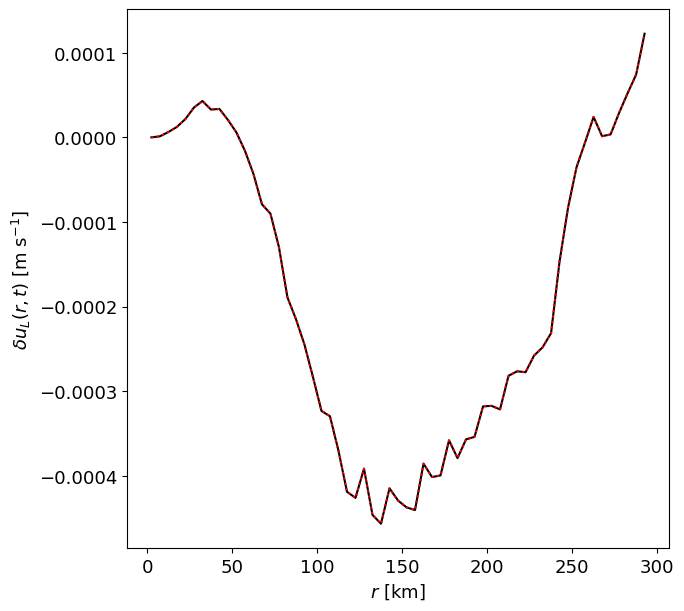

In [35]:
fig = plt.figure(figsize=(7,7))
ax = plt.gca()

ax.plot(mSF_15.dr.values[imSF,:]*1e-3, mSF_15.ulls[imSF,:], '-k')#, linewidth=0.5)#, alpha=0.1)
ax.plot(test_run.dr.values[itest,:]*1e-3, test_run.ulls[itest,:], ':r')#, linewidth=0.5)#, alpha=0.1)
#ax.plot(dudlt_aver_angl.dr.mean('time')*1e-3, dudlt_aver_angl.ulls.T.mean('time'), '-r', linewidth=1.5)
ax.set_xlabel('$r$ [km]')
ax.set_ylabel('$\\delta u_L(r, t)$ [m s$^{-1}$]')

cugn_plotting.set_fontsize(ax, 13)
plt.show()

----

In [25]:
test_r1 = xarray.load_dataset('test_region_1.nc')

In [26]:
test_r1

<xarray.Dataset> Size: 61kB
Dimensions:    (time: 60, mid_rbins: 25)
Coordinates:
    lev        int64 8B 1
  * time       (time) float64 480B 6.064e+08 6.064e+08 ... 6.114e+08 6.115e+08
  * mid_rbins  (mid_rbins) float64 200B 2.5e+03 7.5e+03 ... 1.175e+05 1.225e+05
Data variables:
    dr         (time, mid_rbins) float64 12kB 2.5e+03 7.5e+03 ... 1.225e+05
    ulls       (time, mid_rbins) float64 12kB -0.001155 -0.004622 ... -0.05435
    utts       (time, mid_rbins) float64 12kB -0.003025 -0.006368 ... -0.05043
    du2        (time, mid_rbins) float64 12kB 2.394e-05 0.0001508 ... 0.003586
    du3        (time, mid_rbins) float64 12kB -8.919e-08 ... -0.0002614
Attributes:
    description:  Structure Function Dataset
    Model:        Two-layer QG Turbulence

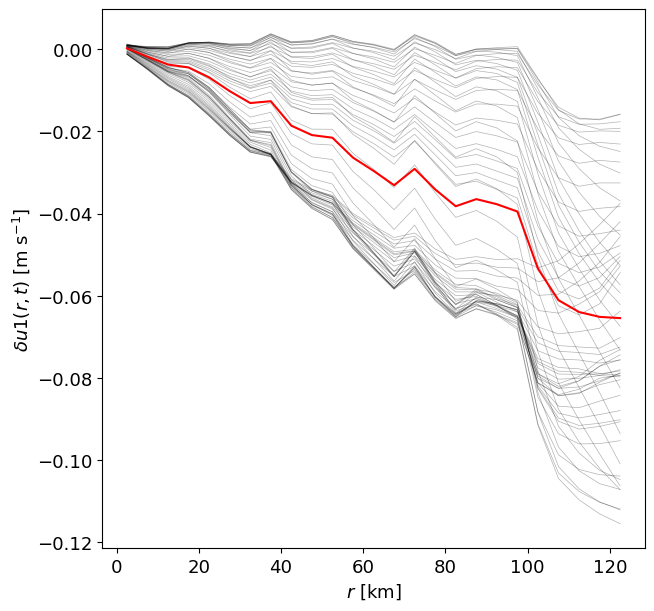

In [34]:
fig = plt.figure(figsize=(7,7))
ax = plt.gca()

ax.plot(test_r1.dr.values[0,:]*1e-3, test_r1.ulls.T, '-k', linewidth=0.5, alpha=0.3)
ax.plot(test_r1.dr.mean('time')*1e-3, test_r1.ulls.T.mean('time'), '-r', linewidth=1.5)
ax.set_xlabel('$r$ [km]')
ax.set_ylabel('$\\delta u1(r, t)$ [m s$^{-1}$]')

cugn_plotting.set_fontsize(ax, 13)
plt.show()

In [36]:
7020/365

19.232876712328768